In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/CS\ 269\ Final\ Project

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project


# Imports

In [ ]:
import pandas as pd
import os
import cv2
import numpy as np
from torch.utils.data import Dataset
from torch import Tensor
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pickle
from torch import optim
import sys
sys.path.insert(1, '/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project/burned-area-baseline')

from neural_net import dataset

In [ ]:
print(sys.path)

['/content', '/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project/burned-area-baseline', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
!ls '/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project/Satellite_burned_area_dataset'
# Run this command to set the folder_list

EMSR207_01MIRANDADOCORVO_02GRADING_MAP_v2_vector
EMSR207_02LOUSA_02GRADING_MAP_v2_vector
EMSR207_03PAMPILHOSADASERRA_02GRADING_MAP_v2_vector
EMSR207_04AVELAR_02GRADING_MAP_v2_vector
EMSR207_05PEDROGAOGRANDE_02GRADING_MAP_v2_vector
EMSR207_06MADEIRA_02GRADING_MAP_v2_vector
EMSR207_07ALVAIAZERE_02GRADING_MAP_v2_vector
EMSR207_08CERNACHEDOBONJARDIM_02GRADING_MAP_v2_vector
EMSR207_10ORVALHO_02GRADING_MAP_v2_vector
EMSR209_01MOGUER_02GRADING_MAP_v2_vector
EMSR209_02MAZAGON_02GRADING_MAP_v2_vector
EMSR209_03LOSCABEZUDOS_02GRADING_MAP_v1_vector
EMSR209_04CHOZASDELAPOLEOSA_02GRADING_MAP_v1_vector
EMSR209_05MAZAGONDETAIL01_02GRADING_MAP_v1_vector
EMSR210_04TRASLASIERRA_02GRADING_MAP_v2_vector
EMSR210_05ELCAMPILLOOVERVIEW_02GRADING_MAP_v1_vector
EMSR211_01SONEJAWEST_02GRADING_MAP_v1_vector
EMSR211_02SONEJA_02GRADING_MAP_v1_vector
EMSR213_01VESUVIO_02GRADING_MAP_v2_vector
EMSR213_03FRANCOFONTE_02GRADING_MAP_v1_vector
EMSR213_04AVOLA_02GRADING_MAP_v1_vector
EMSR213_06MONREALE_02GRADING_MAP_v2_vect

# Dataset from original GitHub

[Satellite Burn Dataset](https://github.com/lccol/burned-area-baseline)

In [ ]:
main_folder = 'Satellite_burned_area_dataset'
satellite_data = pd.read_csv("satellite_data.csv")
# folder_list = satellite_data["folder"] # To use this, move everything from the dataset_unused folder back into the main_folder
folder_list = ['EMSR207_01MIRANDADOCORVO_02GRADING_MAP_v2_vector', 'EMSR207_02LOUSA_02GRADING_MAP_v2_vector', 'EMSR207_03PAMPILHOSADASERRA_02GRADING_MAP_v2_vector', 'EMSR207_04AVELAR_02GRADING_MAP_v2_vector', 'EMSR207_05PEDROGAOGRANDE_02GRADING_MAP_v2_vector', 'EMSR207_06MADEIRA_02GRADING_MAP_v2_vector', 'EMSR207_07ALVAIAZERE_02GRADING_MAP_v2_vector', 'EMSR207_08CERNACHEDOBONJARDIM_02GRADING_MAP_v2_vector', 'EMSR207_10ORVALHO_02GRADING_MAP_v2_vector', 'EMSR209_01MOGUER_02GRADING_MAP_v2_vector', 'EMSR209_02MAZAGON_02GRADING_MAP_v2_vector', 'EMSR209_03LOSCABEZUDOS_02GRADING_MAP_v1_vector', 'EMSR209_04CHOZASDELAPOLEOSA_02GRADING_MAP_v1_vector', 'EMSR209_05MAZAGONDETAIL01_02GRADING_MAP_v1_vector', 'EMSR210_04TRASLASIERRA_02GRADING_MAP_v2_vector', 'EMSR210_05ELCAMPILLOOVERVIEW_02GRADING_MAP_v1_vector', 'EMSR211_01SONEJAWEST_02GRADING_MAP_v1_vector', 'EMSR211_02SONEJA_02GRADING_MAP_v1_vector', 'EMSR213_01VESUVIO_02GRADING_MAP_v2_vector', 'EMSR213_03FRANCOFONTE_02GRADING_MAP_v1_vector', 'EMSR213_04AVOLA_02GRADING_MAP_v1_vector', 'EMSR213_06MONREALE_02GRADING_MAP_v2_vector', 'EMSR213_07SANVITOLOCAPO_02GRADING_MAP_v2_vector', 'EMSR213_08BLUFI_02GRADING_MAP_v2_vector', 'EMSR213_09MISTRETTA_02GRADING_MAP_v2_vector', 'EMSR213_10MESSINA_02GRADING_MAP_v1_vector', 'EMSR213_11NASO_02GRADING_MAP_v1_vector', 'EMSR213_12ETNANORD_02GRADING_MAP_v1_vector', 'EMSR214_01OLMETA_02GRADING_MAP_v2_vector', 'EMSR214_02LABASTIDONNE_02GRADING_MAP_v1_vector', 'EMSR214_04MARSEILLE_02GRADING_MAP_v1_vector', 'EMSR214_05LELAVANDOU_02GRADING_MAP_v1_vector', 'EMSR214_06COGOLIN_02GRADING_MAP_v2_vector', 'EMSR216_01LOSCOLLADOS_02GRADING_MAP_v1_vector', 'EMSR216_02TORREPEDRO_02GRADING_MAP_v1_vector', 'EMSR216_04RALA_02GRADING_MAP_v1_vector', 'EMSR216_05ELCALAR_02GRADING_MAP_v2_vector', 'EMSR217_01DUKAT_02GRADING_MAP_v2_vector', 'EMSR217_02VRANISHT_02GRADING_MAP_v1_vector', 'EMSR219_01SEGURADELASIERRA_02GRADING_MAP_v1_vector', 'EMSR221_01OGLIASTRO_02GRADING_MAP_v2_vector', 'EMSR226_01DABA_02GRADING_MAP_v1_vector', 'EMSR227_01ENCINEDO_02GRADING_MAP_v2_vector', 'EMSR227_02CORPORALES_02GRADING_MAP_v2_vector', 'EMSR227_03SANTAEULALIADECABRERA_02GRADING_MAP_v2_vector', 'EMSR237_03ELMADRONO_02GRADING_MAP_v1_vector', 'EMSR237_04ELCASTILLODELASGUARDAS_02GRADING_MAP_v1_vector', 'EMSR239_05ALMADENDELAPLATAOVERVIEW_02GRADING_MAP_v1_vector', 'EMSR248_01PINODELORO_02GRADING_MAP_v1_vector', 'EMSR248_04HOYOSDEMIGUELMUNOZ_02GRADING_MAP_v1_vector', 'EMSR250_01MARINHAGRANDE_02GRADING_MAP_v2_vector', 'EMSR250_04CORTES_02GRADING_MAP_v2_vector', 'EMSR252_02HAUTECORSEDETAIL_02GRADING_MAP_v1_vector', 'EMSR254_01PORTELADEAGUIAR_02GRADING_MAP_v2_vector', 'EMSR254_02SILVAN_02GRADING_MAP_v2_vector', 'EMSR254_03PERENADELARIBERA_02GRADING_MAP_v2_vector', 'EMSR281_01KIRTOMY_02GRADING_MAP_v1_vector', 'EMSR290_03MANSBO_02GRADING_MAP_v1_vector', 'EMSR298_02HAMMARSTRAND_02GRADING_MAP_v1_vector', 'EMSR298_05STRANDASMYRVALLEN_02GRADING_MAP_v1_vector', 'EMSR298_06GROTINGEN_02GRADING_MAP_v1_vector', 'EMSR302_01NERVA_02GRADING_MAP_v1_vector', 'EMSR302_07ELPERALEJO_02GRADING_MAP_v1_vector', 'EMSR365_AOI01_GRA_PRODUCT_r1_RTP01_v1_vector', 'EMSR368_AOI01_GRA_PRODUCT_r1_RTP01_v3_vector', 'EMSR371_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector', 'EMSR372_AOI04_GRA_PRODUCT_r1_RTP01_v3_vector', 'EMSR373_AOI01_GRA_PRODUCT_r1_RTP01_v2_vector']

dataset_config = {
        'folder': main_folder,
        'mask_intervals': [(0, 36), (37, 255)],
        'mask_one_hot': False,
        'height': 512,
        'width': 512,
        'product_list': ['sentinel2'],
        'mode': 'post',
        'filter_validity_mask': True,
        'transform': None,
        'process_dict': {
            'sentinel2': [0, 1, 2]
        },
        'activation_date_csv': "satellite_data.csv",
        'mask_filtering': False,
        'only_burnt': True
    }


ds_temp = dataset.SatelliteDataset(folder_list=folder_list, **dataset_config)

Empty folder found Satellite_burned_area_dataset/EMSR211_01SONEJAWEST_02GRADING_MAP_v1_vector for product sentinel2


/content/drive/.shortcut-targets-by-id/1D7-XvnrgJ1RYOpB4A4_0Sq_4Nc3FHbQh/CS 269 Final Project/burned-area-baseline/neural_net/image_processor.py:343: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  result = rescale(img, max(rescale_height, rescale_width), multichannel=True)


Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR211_01SONEJAWEST_02GRADING_MAP_v1_vector
product: sentinel2
mode: post
date: 
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR214_02LABASTIDONNE_02GRADING_MAP_v1_vector
product: sentinel2
mode: post
date: 2017-08-18
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR250_04CORTES_02GRADING_MAP_v2_vector
product: sentinel2
mode: post
date: 2017-10-22
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR252_02HAUTECORSEDETAIL_02GRADING_MAP_v1_vector
product: sentinel2
mode: post
date: 2017-10-24
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR254_01PORTELADEAGUIAR_02GRADING_MAP_v2_vector
product: sentinel2
mode: post
date: 2017-10-22
Invalid product requested:
root: Satellite_burned_area_dataset
folder: EMSR254_02SILVAN_02GRADING_MAP_v2_vector
product: sentinel2
mode: post
date: 2017-10-22
Invalid product requested:


# UNet Finetuning

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split

n_val = int(len(ds) * 0.1)
n_train = len(ds) - n_val
train_set, val_set = random_split(ds, [n_train, n_val], generator=torch.Generator().manual_seed(0))

loader_args = dict(batch_size=1, num_workers=os.cpu_count(), pin_memory=True)
train_loader = DataLoader(train_set, shuffle=True, **loader_args)
val_loader = DataLoader(val_set, shuffle=False, drop_last=True, **loader_args)

In [ ]:
import torch
net = torch.hub.load('milesial/Pytorch-UNet', 'unet_carvana', pretrained=True, scale=0.5)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = net.to(device)
input = torch.from_numpy(original_tiles[22])
input = input.permute([2,1,0]).unsqueeze(0)
input = input.type(torch.FloatTensor)
input = input.to(device)

In [ ]:
import torch.nn.functional as F

In [ ]:
original_tiles[0].shape

In [ ]:
net.n_classes

In [ ]:
with torch.no_grad():
  output = net(input).cpu()
  output = F.interpolate(output, (original_tiles[22].shape[0], original_tiles[22].shape[1]), mode='bilinear')
  if net.n_classes > 1:
      mask = output.argmax(dim=1)

In [ ]:
mask.shape

NameError: name 'mask' is not defined

In [ ]:
mask = np.argmax(mask, axis=0)
mask.shape

torch.Size([512, 512])

In [ ]:
mask.numpy().shape

(512, 512)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
mask

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

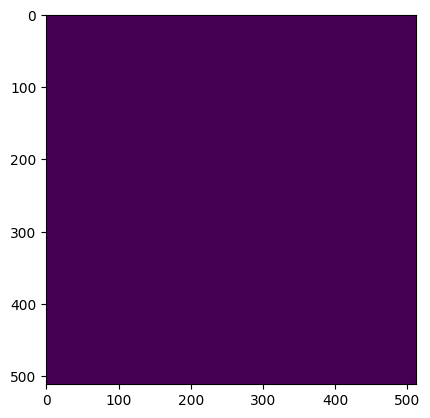

In [ ]:
plt.imshow(mask.numpy() * 255)

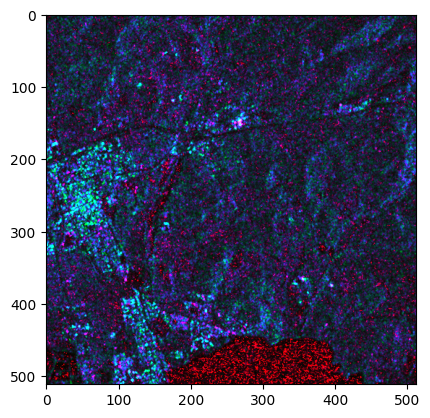

In [ ]:
plt.imshow(original_tiles[22])

# UNet Model Training

In [ ]:

""" Parts of the U-Net model """


class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)


""" Full assembly of the parts to form the complete network """


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = (DoubleConv(n_channels, 64))
        self.down1 = (Down(64, 128))
        self.down2 = (Down(128, 256))
        self.down3 = (Down(256, 512))
        factor = 2 if bilinear else 1
        self.down4 = (Down(512, 1024 // factor))
        self.up1 = (Up(1024, 512 // factor, bilinear))
        self.up2 = (Up(512, 256 // factor, bilinear))
        self.up3 = (Up(256, 128 // factor, bilinear))
        self.up4 = (Up(128, 64, bilinear))
        self.outc = (OutConv(64, n_classes))

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

    def use_checkpointing(self):
        self.inc = torch.utils.checkpoint(self.inc)
        self.down1 = torch.utils.checkpoint(self.down1)
        self.down2 = torch.utils.checkpoint(self.down2)
        self.down3 = torch.utils.checkpoint(self.down3)
        self.down4 = torch.utils.checkpoint(self.down4)
        self.up1 = torch.utils.checkpoint(self.up1)
        self.up2 = torch.utils.checkpoint(self.up2)
        self.up3 = torch.utils.checkpoint(self.up3)
        self.up4 = torch.utils.checkpoint(self.up4)
        self.outc = torch.utils.checkpoint(self.outc)


In [ ]:
batch_size = 4
validation_split = .2
shuffle_dataset = True
random_seed= 42

dataset_size = len(ds_temp)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

In [ ]:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [ ]:
len(train_indices)

306

In [ ]:
train_loader = torch.utils.data.DataLoader(ds_temp, batch_size=batch_size,
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(ds_temp, batch_size=batch_size,
                                                sampler=valid_sampler)

In [ ]:
print(len(train_loader))

77


In [ ]:
model = UNet(3, 2)

In [ ]:
learning_rate = 1e-5
weight_decay = 1e-8
momentum = 0.999
gradient_clipping = 1.0

In [ ]:
optimizer = optim.RMSprop(model.parameters(),
                              lr=learning_rate, weight_decay=weight_decay, momentum=momentum, foreach=True)

In [ ]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=5)

In [ ]:
amp = False

In [ ]:
grad_scaler = torch.cuda.amp.GradScaler(enabled=amp)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
epochs = 100

In [ ]:
def dice_coeff(input: Tensor, target: Tensor, reduce_batch_first: bool = False, epsilon: float = 1e-6):
    # Average of Dice coefficient for all batches, or for a single mask
    if input.size() != target.size():
      print(f'Assertion failed: input size = {input.size()}, target size = {target.size()}')

    assert input.size() == target.size()
    assert input.dim() == 3 or not reduce_batch_first

    sum_dim = (-1, -2) if input.dim() == 2 or not reduce_batch_first else (-1, -2, -3)

    inter = 2 * (input * target).sum(dim=sum_dim)
    sets_sum = input.sum(dim=sum_dim) + target.sum(dim=sum_dim)
    sets_sum = torch.where(sets_sum == 0, inter, sets_sum)

    dice = (inter + epsilon) / (sets_sum + epsilon)
    return dice.mean()


def multiclass_dice_coeff(input: Tensor, target: Tensor, reduce_batch_first: bool = False, epsilon: float = 1e-6):
    # Average of Dice coefficient for all classes
    return dice_coeff(input.flatten(0, 1), target.flatten(0, 1), reduce_batch_first, epsilon)


def dice_loss(input: Tensor, target: Tensor, multiclass: bool = False):
    # Dice loss (objective to minimize) between 0 and 1
    fn = multiclass_dice_coeff if multiclass else dice_coeff
    return 1 - fn(input, target, reduce_batch_first=True)

In [ ]:
n_train = len(train_indices)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
@torch.inference_mode()
def evaluate(net, dataloader, device, amp):
    net.eval()
    num_val_batches = len(dataloader)
    dice_score = 0

    # iterate over the validation set
    with torch.autocast(device.type if device.type != 'mps' else 'cpu', enabled=amp):
        for batch in tqdm(dataloader, total=num_val_batches, desc='Validation round', unit='batch', leave=False):
            image, mask_true = batch['image'], batch['mask']

            # move images and labels to correct device and type
            image = image.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
            mask_true = mask_true.to(device=device, dtype=torch.long).squeeze(3)

            # print(type(image))

            # predict the mask
            mask_pred = net(image)

            assert mask_true.min() >= 0 and mask_true.max() <= 1, 'True mask indices should be in [0, 1]'
            mask_pred = (F.sigmoid(mask_pred) > 0.5).float()
            # compute the Dice score

            dice_score += dice_coeff(F.softmax(mask_pred, dim=1).float(), F.one_hot(mask_true, net.n_classes).permute(0, 3, 1, 2).float(), reduce_batch_first=False)

    net.train()
    return dice_score / max(num_val_batches, 1)

In [ ]:
global_step = 0

for epoch in range(1, epochs + 1):
  model.to(device)
  model.train()
  epoch_loss = 0
  with tqdm(total=n_train, desc=f'Epoch {epoch}/{epochs}', unit='img') as pbar:
      for batch in train_loader:
          images, true_masks = batch['image'], batch['mask']
          images.to(device)
          true_masks.to(device)

          assert images.shape[1] == model.n_channels, \
              f'Network has been defined with {model.n_channels} input channels, ' \
              f'but loaded images have {images.shape[1]} channels. Please check that ' \
              'the images are loaded correctly.'

          images = images.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
          true_masks = true_masks.to(device=device, dtype=torch.long).squeeze(3)

          with torch.autocast(device.type if device.type != 'mps' else 'cpu', enabled=amp):
              masks_pred = model(images)

              if model.n_classes == 1:
                  loss = criterion(masks_pred.squeeze(1), true_masks.float())
                  loss += dice_loss(F.sigmoid(masks_pred.squeeze(1)), true_masks.float(), multiclass=False)
              else:
                  loss = criterion(masks_pred, true_masks)
                  loss += dice_loss(
                      F.softmax(masks_pred, dim=1).float(),
                      F.one_hot(true_masks, model.n_classes).permute(0, 3, 1, 2).float(),
                      multiclass=True
                  )

          optimizer.zero_grad(set_to_none=True)
          grad_scaler.scale(loss).backward()
          grad_scaler.unscale_(optimizer)
          torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clipping)
          grad_scaler.step(optimizer)
          grad_scaler.update()

          pbar.update(images.shape[0])
          global_step += 1
          epoch_loss += loss.item()
          pbar.set_postfix(**{'loss (batch)': loss.item()})

          # Evaluation round
          division_step = (n_train // (5 * batch_size))
          if division_step > 0:
              if global_step % division_step == 0:
                  val_score = evaluate(model, validation_loader, device, amp)
                  scheduler.step(val_score)

Validation round:  95%|█████████▍| 18/19 [00:07<00:00,  2.55batch/s]

In [ ]:
torch.save(model.state_dict(), '100_epoch_post_burn_weights.pth')

In [ ]:
import pickle

with open('ds3.pkl', 'wb') as f:
    pickle.dump(ds_temp, f)

# Testing the Model

In [ ]:
# Score based on https://www.jeremyjordan.me/evaluating-image-segmentation-models/
# Basically you take the intersection of the prediction and true values, divide it by the union
# where one of them is 1

@torch.inference_mode()
def test_accuracy(model, dataloader, device, amp):
  num_val_batches = len(dataloader)
  dice_score = 0

  accuracies = []
  # iterate over the validation set
  with torch.autocast(device.type if device.type != 'mps' else 'cpu', enabled=amp):
    for batch in tqdm(dataloader, total=num_val_batches, desc='Validation round', unit='batch', leave=False):
      image, mask_true = batch['image'], batch['mask']

      # move images and labels to correct device and type
      image = image.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
      mask_true = mask_true.to(device=device, dtype=torch.long).squeeze(3)


      # predict the mask
      mask_pred = model(image)

      assert mask_true.min() >= 0 and mask_true.max() <= 1, 'True mask indices should be in [0, 1]'
      mask_pred = (F.sigmoid(mask_pred) > 0.5).float()

      mask_true = mask_true.to('cpu')
      mask_pred = mask_pred[:,1,:,:].to('cpu')


      intersection = np.logical_and(mask_true, mask_pred)
      union = np.logical_or(mask_true, mask_pred)
      total_intersect = np.sum(intersection.numpy().flatten())
      total_union = np.sum(union.numpy().flatten())
      if total_union == 0:
        continue
      iou_score = total_intersect / total_union

      accuracies.append(iou_score)
      print(f'\nIOU Score: {iou_score}')

  return np.mean(accuracies)


In [ ]:
score = test_accuracy(model, validation_loader, device, amp)
print(f'Average IOU Score: {score}')

Validation round:   5%|▌         | 1/19 [00:00<00:08,  2.21batch/s]


IOU Score: 0.5573094096862444


Validation round:  11%|█         | 2/19 [00:00<00:06,  2.44batch/s]


IOU Score: 0.78711057506315


Validation round:  16%|█▌        | 3/19 [00:01<00:06,  2.52batch/s]


IOU Score: 0.8019062339000516


Validation round:  21%|██        | 4/19 [00:01<00:05,  2.53batch/s]


IOU Score: 0.8727930553174817


Validation round:  26%|██▋       | 5/19 [00:01<00:05,  2.54batch/s]


IOU Score: 0.7777285495033736


Validation round:  32%|███▏      | 6/19 [00:02<00:05,  2.54batch/s]


IOU Score: 0.01831908274046516


Validation round:  37%|███▋      | 7/19 [00:02<00:04,  2.57batch/s]


IOU Score: 0.8021769981993908


Validation round:  42%|████▏     | 8/19 [00:03<00:04,  2.56batch/s]


IOU Score: 0.7477294554474164


Validation round:  47%|████▋     | 9/19 [00:03<00:03,  2.58batch/s]


IOU Score: 0.2054712305428638


Validation round:  53%|█████▎    | 10/19 [00:03<00:03,  2.56batch/s]


IOU Score: 0.7053712781582009


Validation round:  58%|█████▊    | 11/19 [00:04<00:03,  2.57batch/s]


IOU Score: 0.6946562726818555


Validation round:  63%|██████▎   | 12/19 [00:04<00:02,  2.54batch/s]


IOU Score: 0.5416155365408427


Validation round:  68%|██████▊   | 13/19 [00:05<00:02,  2.52batch/s]


IOU Score: 0.667009183739002


Validation round:  74%|███████▎  | 14/19 [00:05<00:01,  2.55batch/s]


IOU Score: 0.4300828582639001


Validation round:  79%|███████▉  | 15/19 [00:05<00:01,  2.53batch/s]


IOU Score: 0.24772412954604173


Validation round:  84%|████████▍ | 16/19 [00:06<00:01,  2.53batch/s]


IOU Score: 0.8121778911813139


Validation round:  89%|████████▉ | 17/19 [00:06<00:00,  2.52batch/s]


IOU Score: 0.3883353617400679


Validation round:  95%|█████████▍| 18/19 [00:07<00:00,  2.54batch/s]


IOU Score: 0.6985293274796822



IOU Score: 0.7897344163295303
Average IOU Score: 0.6076726761084671


In [ ]:
# Score based on https://www.jeremyjordan.me/evaluating-image-segmentation-models/
# Basically you take the intersection of the prediction and true values, divide it by the union
# where one of them is 1

@torch.inference_mode()
def test_accuracy_2(model, dataloader, device, amp):
  num_val_batches = len(dataloader)
  dice_score = 0

  images_passed_in = []
  out_images = []
  processed_out_images = []
  fully_processed_out_images = []
  true_mask_images = []
  accuracies = []
  # iterate over the validation set
  with torch.autocast(device.type if device.type != 'mps' else 'cpu', enabled=amp):
    for batch in tqdm(dataloader, total=num_val_batches, desc='Validation round', unit='batch', leave=False):
      image, mask_true = batch['image'], batch['mask']

      # move images and labels to correct device and type
      image = image.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
      images_passed_in.append(image)
      mask_true = mask_true.to(device=device, dtype=torch.long)



      # predict the mask
      mask_pred = model(image)
      out_images.append(mask_pred)

      assert mask_true.min() >= 0 and mask_true.max() <= 1, 'True mask indices should be in [0, 1]'
      mask_pred = (F.sigmoid(mask_pred) > 0.5).float()
      processed_out_images.append(mask_pred)


      mask_true = mask_true.to('cpu')
      true_mask_images.append(mask_true)
      mask_pred = mask_pred[:,0,:,:].to('cpu')
      fully_processed_out_images.append(mask_pred)


      intersection = np.logical_and(mask_true, mask_pred)
      union = np.logical_or(mask_true, mask_pred)
      total_intersect = np.sum(intersection.numpy().flatten())
      total_union = np.sum(union.numpy().flatten())
      if total_union == 0:
        continue
      iou_score = total_intersect / total_union

      accuracies.append(iou_score)
      print(f'\nIOU Score: {total_intersect} / {total_union} = {iou_score}')
  return images_passed_in, out_images, processed_out_images, true_mask_images, fully_processed_out_images


# Example

In [ ]:
iterator = iter(validation_loader)
next(iterator)
item = next(iterator)

In [ ]:
model.load_state_dict(torch.load('30_epoch_post_burn_weights.pth'))

<All keys matched successfully>

In [ ]:
item = next(iterator)

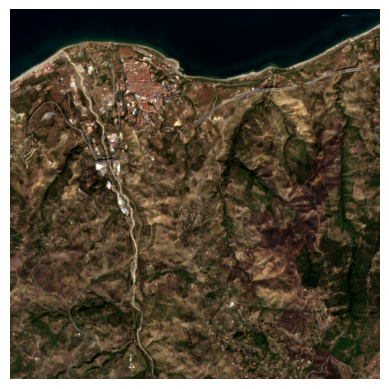

In [ ]:
plt.axis('off')
plt.imshow(item['image'][3,:,:,:].squeeze(0).numpy().transpose((1, 2, 0)).astype(int))

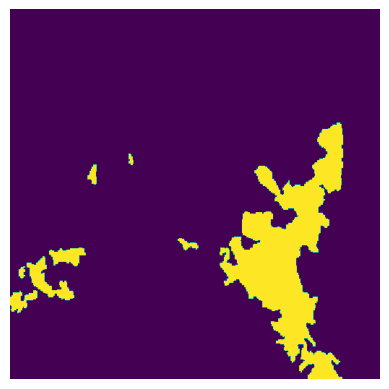

In [ ]:
plt.axis('off')
plt.imshow(item['mask'][3,:,:,:].numpy().astype(int))

In [ ]:
image = item['image']
device = 'cuda'
image = image.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
image = image.cpu()
mask_pred = model(image)

In [ ]:
print(mask_pred[3,1,:,:].to('cpu').shape)

torch.Size([512, 512])


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


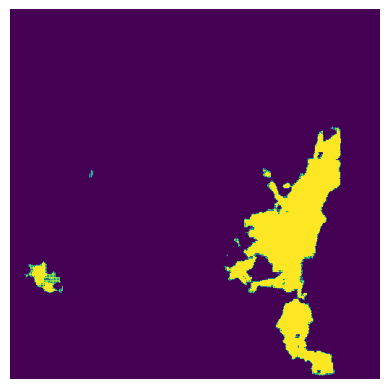

In [ ]:
plt.axis('off')
prediction = mask_pred[3,1,:,:]
thresholded = (prediction>=0.5).float()
print(thresholded)
plt.imshow(thresholded.detach().numpy().astype(int))

## Try model on your own images

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(3, 2)
model.to(device)
weights_filepath = '50_epoch_post_burn_weights.pth'
model.load_state_dict(torch.load(weights_filepath))
model.to(device)

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

In [ ]:
@torch.inference_mode()
def inference_on_image(image):
  dice_score = 0

  accuracies = []
  # iterate over the validation set
  with torch.autocast(device.type if device.type != 'mps' else 'cpu', enabled=amp):
    # move images and labels to correct device and type
    image = image.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)

    # predict the mask
    mask_pred = model(image)

  return mask_pred

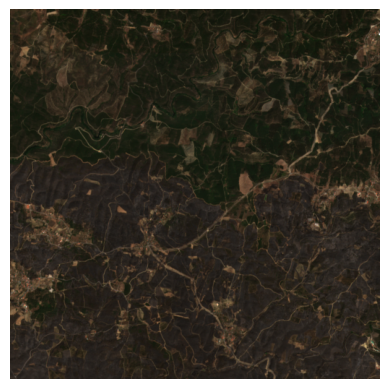

In [ ]:
iterator = iter(validation_loader)
next(iterator)
image = next(iterator)['image']
plt.axis('off')
plt.imshow(image[0,:,:,:].squeeze(0).numpy().transpose((1, 2, 0)).astype(int))

In [ ]:
image.to(device)
mask_pred = inference_on_image(image)

In [ ]:
mask_pred.shape

torch.Size([4, 2, 512, 512])

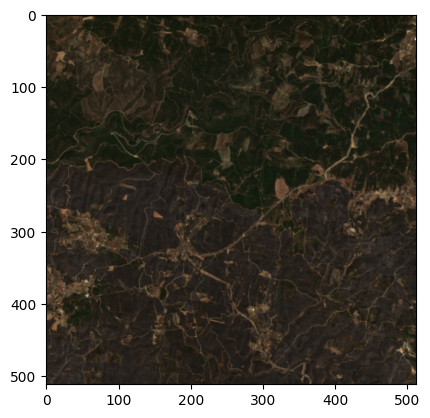

In [ ]:
plt.imshow(image[0,:,:,:].squeeze(0).numpy().transpose((1, 2, 0)).astype(int))

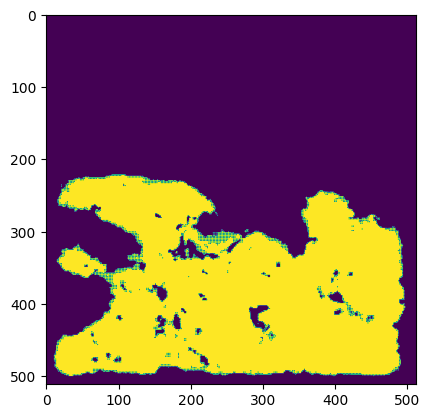

In [ ]:
prediction = mask_pred[0,1,:,:].cpu()
thresholded = (prediction>=0.5).float()
plt.imshow(thresholded)

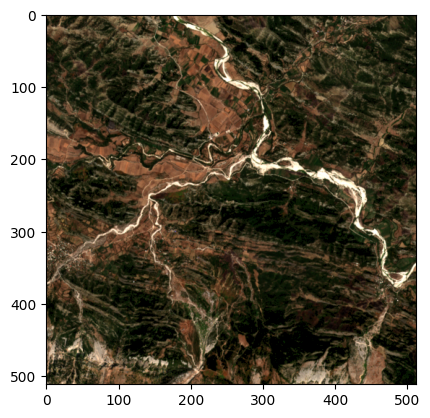

In [ ]:
plt.imshow(image[1,:,:,:].squeeze(0).numpy().transpose((1, 2, 0)).astype(int))

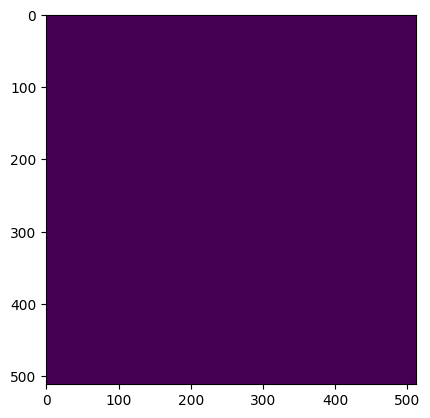

In [ ]:
prediction = mask_pred[1,1,:,:].cpu()
thresholded = (prediction>=0.5).float()
plt.imshow(thresholded)

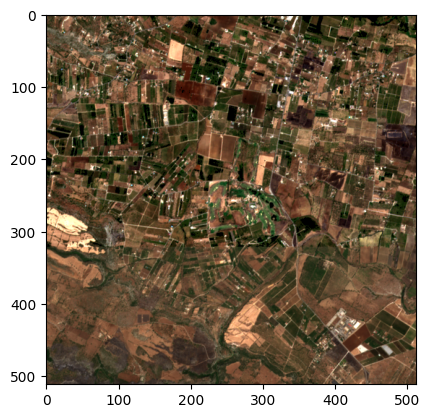

In [ ]:
plt.imshow(image[2,:,:,:].squeeze(0).numpy().transpose((1, 2, 0)).astype(int))

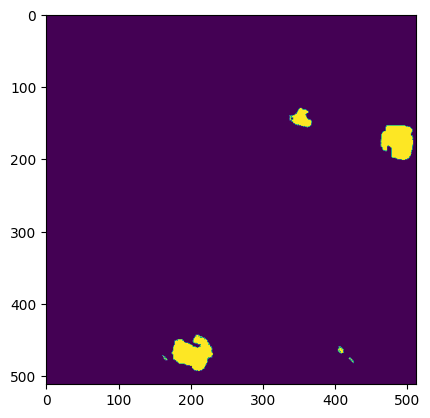

In [ ]:
prediction = mask_pred[2,1,:,:].cpu()
thresholded = (prediction>=0.5).float()
plt.imshow(thresholded)

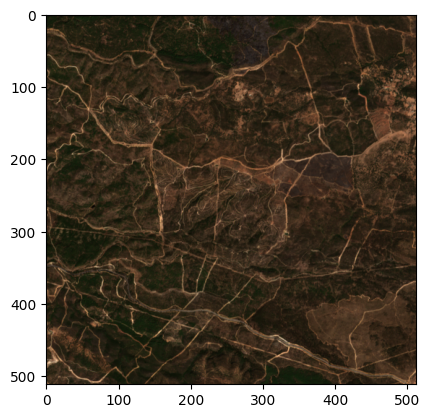

In [ ]:
plt.imshow(image[3,:,:,:].squeeze(0).numpy().transpose((1, 2, 0)).astype(int))

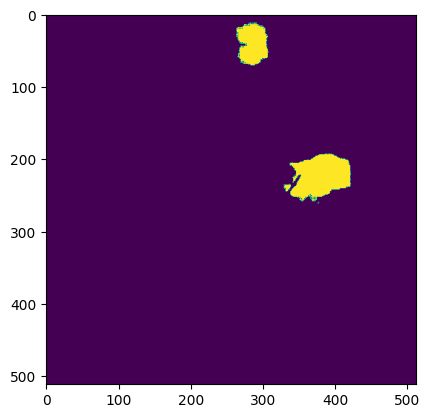

In [ ]:
prediction = mask_pred[3,1,:,:].cpu()
thresholded = (prediction>=0.5).float()
plt.imshow(thresholded)